In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from datetime import datetime
import os
import pickle
import seaborn

In [2]:
def convert_timestamp(string_time):
    temp_time = string_time.split()
    if temp_time[1] == 'mei':
        temp_time[1] = 'may'
    elif temp_time[1] == 'ags':
        temp_time[1] = 'aug'
    elif temp_time[1] == 'okt':
        temp_time[1] = 'oct'
    elif temp_time[1] == 'des':
        temp_time[1] = 'dec'
    fixed_string_time = " ".join(temp_time)
    datetime_obj = datetime.strptime(
        fixed_string_time, "%d %b %Y"
    )
    return datetime_obj.strftime('%Y%m%d')


def import_stock_time_data():
    stock_time_data = dict()
    with open('../data/listing_date.csv', 'r') as file:
        reader = csv.reader(file, delimiter='|')
        for row in reader:
            row[2] = convert_timestamp(row[2])
            stock_time_data[row[0]] = row[2]
    return stock_time_data

def enlarge_bar():
    fig = plt.figure(1, [20, 8])
    ax = fig.add_subplot(111)
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

In [3]:
stock_time_data = import_stock_time_data()
dump_file = open("../data/stock_price.obj", "rb")
price_list = pickle.load(dump_file)
price_list = {idx: gp.xs(idx, level=0, axis=1).dropna()
              for idx, gp in price_list.groupby(level=0, axis=1)}
time_start = "20170101"
time_end = "20210101"

In [4]:
l = []
total = 0
valid = 0
for (k, v) in price_list.items():
    val = len(v[time_start:time_end].Close)
    l.append({"perusahaan": k,
              "enlisting_date": stock_time_data[k.split('.')[0]],
              "count": val,
              "unique_count": len(v[time_start:time_end].Close.value_counts())
             })

In [5]:
df = pd.DataFrame(l)
df

,perusahaan,enlisting_date,count,unique_count
0,AALI.JK,19971209,993,310
1,ABBA.JK,20020403,800,123
2,ABDA.JK,19890706,175,46
3,ABMM.JK,20111206,511,169
4,ACES.JK,20071106,991,209
...,...,...,...,...
742,ZADI.JK,19110101,0,0
743,ZBRA.JK,19910801,220,46
744,ZINC.JK,20171016,792,260
745,ZONE.JK,20181212,505,90


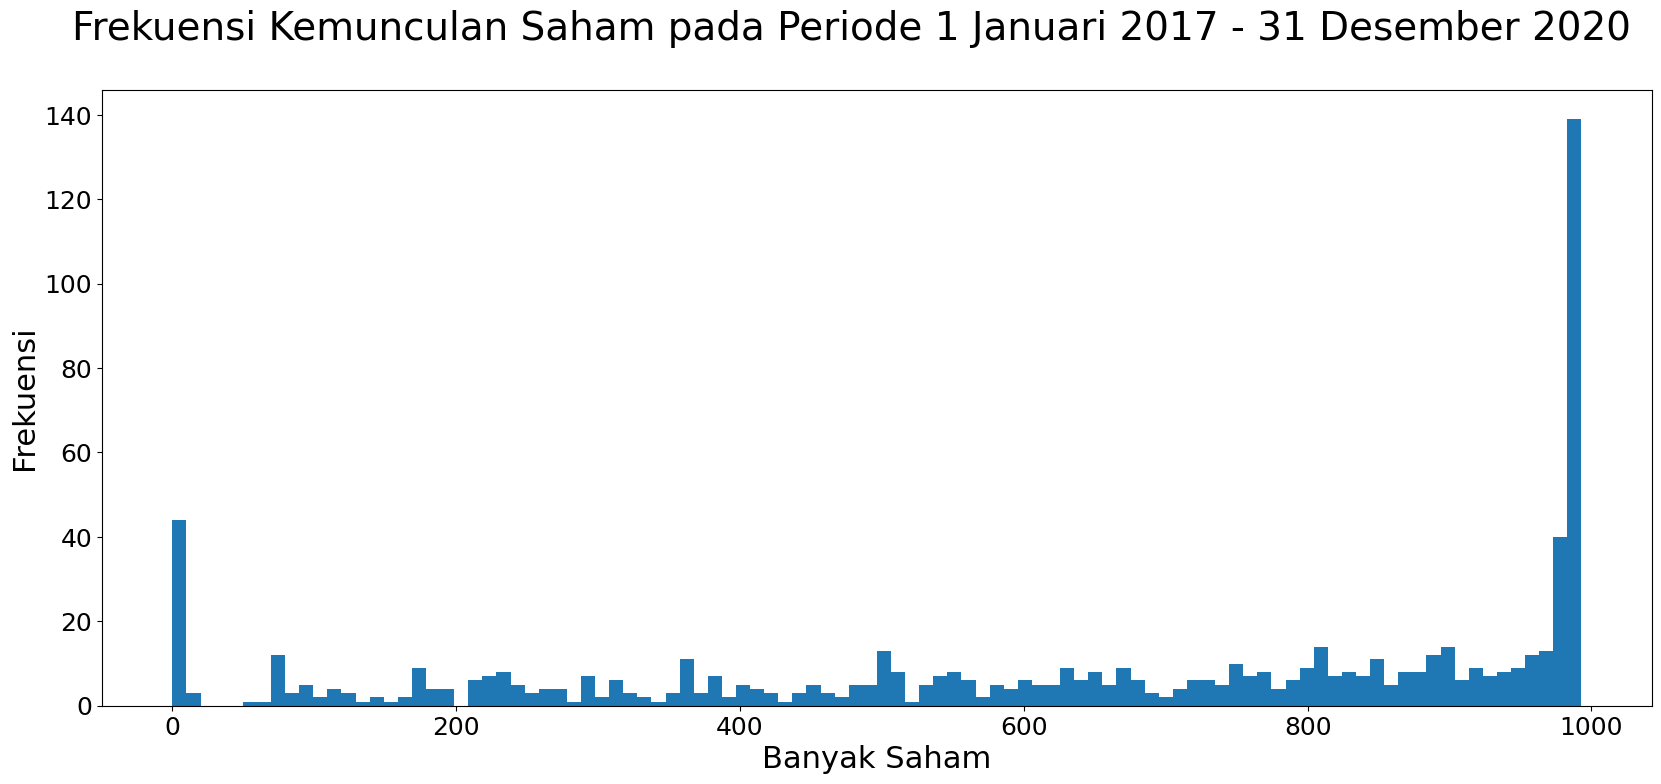

In [6]:
enlarge_bar()
plt.hist(df['count'], bins=100)
plt.ylabel('Frekuensi', fontsize=22)
plt.xlabel('Banyak Saham', fontsize=22)

plt.suptitle('Frekuensi Kemunculan Saham pada Periode 1 Januari 2017 - 31 Desember 2020', fontsize=28)
plt.savefig('../img/stock_price_distribution.png', bbox_inches='tight')

plt.show()

In [14]:
len(df[df['count'] == 0])

40

In [8]:
print(len(df[df['enlisting_date'] >= '20210101']))
df[df['enlisting_date'] >= '20210101'].reset_index()

26


,index,perusahaan,enlisting_date,count,unique_count
0,42,ARCI.JK,20210628,0,0
1,69,BANK.JK,20210201,0,0
2,90,BEBS.JK,20210310,0,0
3,116,BMHS.JK,20210706,0,0
4,192,DCII.JK,20210106,0,0
5,198,DGNS.JK,20210115,0,0
6,222,EDGE.JK,20210208,0,0
7,241,FAPA.JK,20210104,0,0
8,245,FIMP.JK,20210409,0,0
9,249,FLMC.JK,20210708,0,0


In [9]:
df[(df['enlisting_date'] >= '20200101')
   & (df['enlisting_date'] < '20210101')
   & (df['count'] < 10)].reset_index()

,index,perusahaan,enlisting_date,count,unique_count
0,529,PMMP.JK,20201218,7,7
1,718,VICI.JK,20201217,8,8
2,728,WIFI.JK,20201230,1,1


In [10]:
df[(df['enlisting_date'] < '20200101')
   & (df['count'] < 10)].reset_index()

,index,perusahaan,enlisting_date,count,unique_count
0,7,ADFO.JK,19110101,0,0
1,87,BCIC.JK,19970625,4,3
2,174,CMPP.JK,19941208,0,0
3,264,GGST.JK,19110101,0,0
4,276,GRHA.JK,19110101,0,0
5,333,INSA.JK,19110101,0,0
6,492,NIPS.JK,19910724,0,0
7,597,SCPI.JK,19900608,0,0
8,609,SIMM.JK,19110101,0,0
9,638,SPOT.JK,19110101,0,0


In [11]:
df[(df['unique_count'] < 5) & (df['count'] > 0)].reset_index()

,index,perusahaan,enlisting_date,count,unique_count
0,87,BCIC.JK,19970625,4,3
1,112,BLTA.JK,19900326,140,4
2,142,BTEL.JK,20060203,57,1
3,181,CPRO.JK,20061128,504,3
4,300,IATA.JK,20060913,214,4
5,370,KBRI.JK,20080711,77,1
6,421,MAGP.JK,20130116,99,1
7,651,SUGI.JK,20020619,141,2
8,728,WIFI.JK,20201230,1,1


In [12]:
df[df['perusahaan'] == 'PLAN.JK'].reset_index()

,index,perusahaan,enlisting_date,count,unique_count
0,525,PLAN.JK,20200915,71,51
